### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
# Read users.csv in user_df, item.csv in movies_df and Data.csv in ratings_df
users_df = pd.read_csv('user.csv')
movies_df = pd.read_csv('item.csv')
ratings_df = pd.read_csv('Data.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
# applying info for all three dataframes
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
# checking shape of alll dataframes
users_df.shape

(943, 5)

In [7]:
movies_df.shape

(1681, 22)

In [8]:
ratings_df.shape

(100000, 4)

In [9]:
# checking total missing values for dataframes
users_df.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [10]:
movies_df.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [11]:
ratings_df.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [12]:
# all three dataframes descriptions
users_df.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [13]:
movies_df.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
ratings_df.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


#### 4. Find the number of movies per genre using the item data - 5 marks

In [15]:
# use sum on the default axis
# for this operation, drop unncessary columns like movie id, movie title, release date etc
movies_df_with_for_geners = movies_df.drop(columns=['movie id','movie title','release date'])
movies_df_with_for_geners.sum().to_frame()

,0
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


In [16]:
#highest movie fall into drama genre while fantacy is lowest known genre

#### 5. Find the movies that have more than one genre - 2.5 marks

In [17]:
#hint: use sum on the axis = 1

# creating new data frame named mutligenre which drop movie id since movie_id will number that add into column
multi_genre = movies_df.drop(['movie id'],axis=1)

# now add all geners columns and assign new column called multi_genre
multi_genre['multiple_genre'] = multi_genre.sum(axis=1)

# in case of sum is >1 indicates multiple geners for movie, lets filter out and print them.
multi_genre[multi_genre['multiple_genre'] > 1]


,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,multiple_genre
0,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
6,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,3
1668,Tainted,01-Feb-1998,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2
1671,Mirage,01-Jan-1995,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1677,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2


In [18]:
# Total 849 movies have multiple geners.

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [19]:
# filter value with only unknown 0
movies_df = movies_df[movies_df['unknown'] < 1]

In [20]:
# make sure there is no unkown genre in movie
movies_df[movies_df['unknown'] == 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


In [21]:
# unknown movie row dropped.

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [22]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [23]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


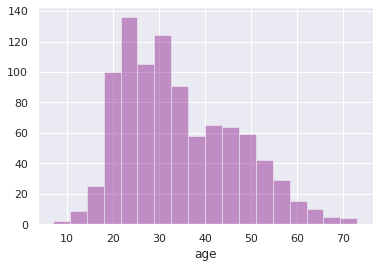

In [24]:
#your answers here

# Univariant ge plot
sns.set()
sns.distplot(users_df['age'],kde=False,color='purple')

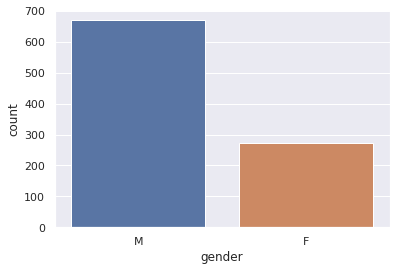

In [25]:
# Univariate gender plot
sns.countplot(users_df['gender'])

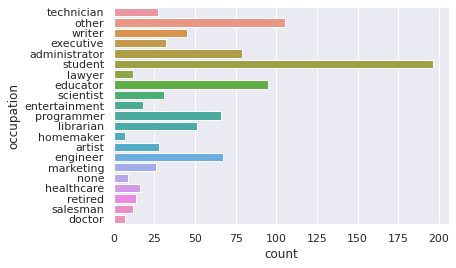

In [26]:
# Univariate occupation plot
sns.set(style="darkgrid")
sns.countplot(y=users_df['occupation'])

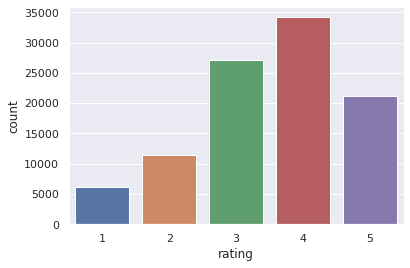

In [27]:
# Univariate rating plot
sns.countplot(ratings_df['rating'])

In [28]:
# now for release year needs some compuatation 
# craete release year from release date column by using lambda
movies_df['release year'] = movies_df['release date'].apply(lambda x:int(x.split('-')[2]))


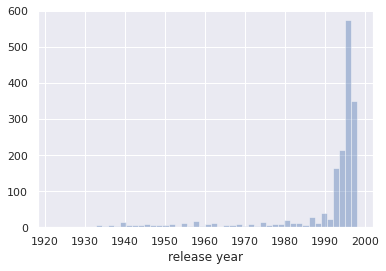

In [29]:
# this will create new column called release year from release date
# now univariant plot it
sns.distplot(movies_df['release year'],kde=False)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [30]:
#Your answer here
# use generes list for easy apply
genere_list = ['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir',
              'Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','unknown']

# now create data frame movie by year with group by release year 
movie_by_year = movies_df.groupby(['release year'])

# now from use of genere list create total movies by genere by year
genere_movie_by_year = movie_by_year[genere_list].sum()
genere_movie_by_year.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,unknown
release year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


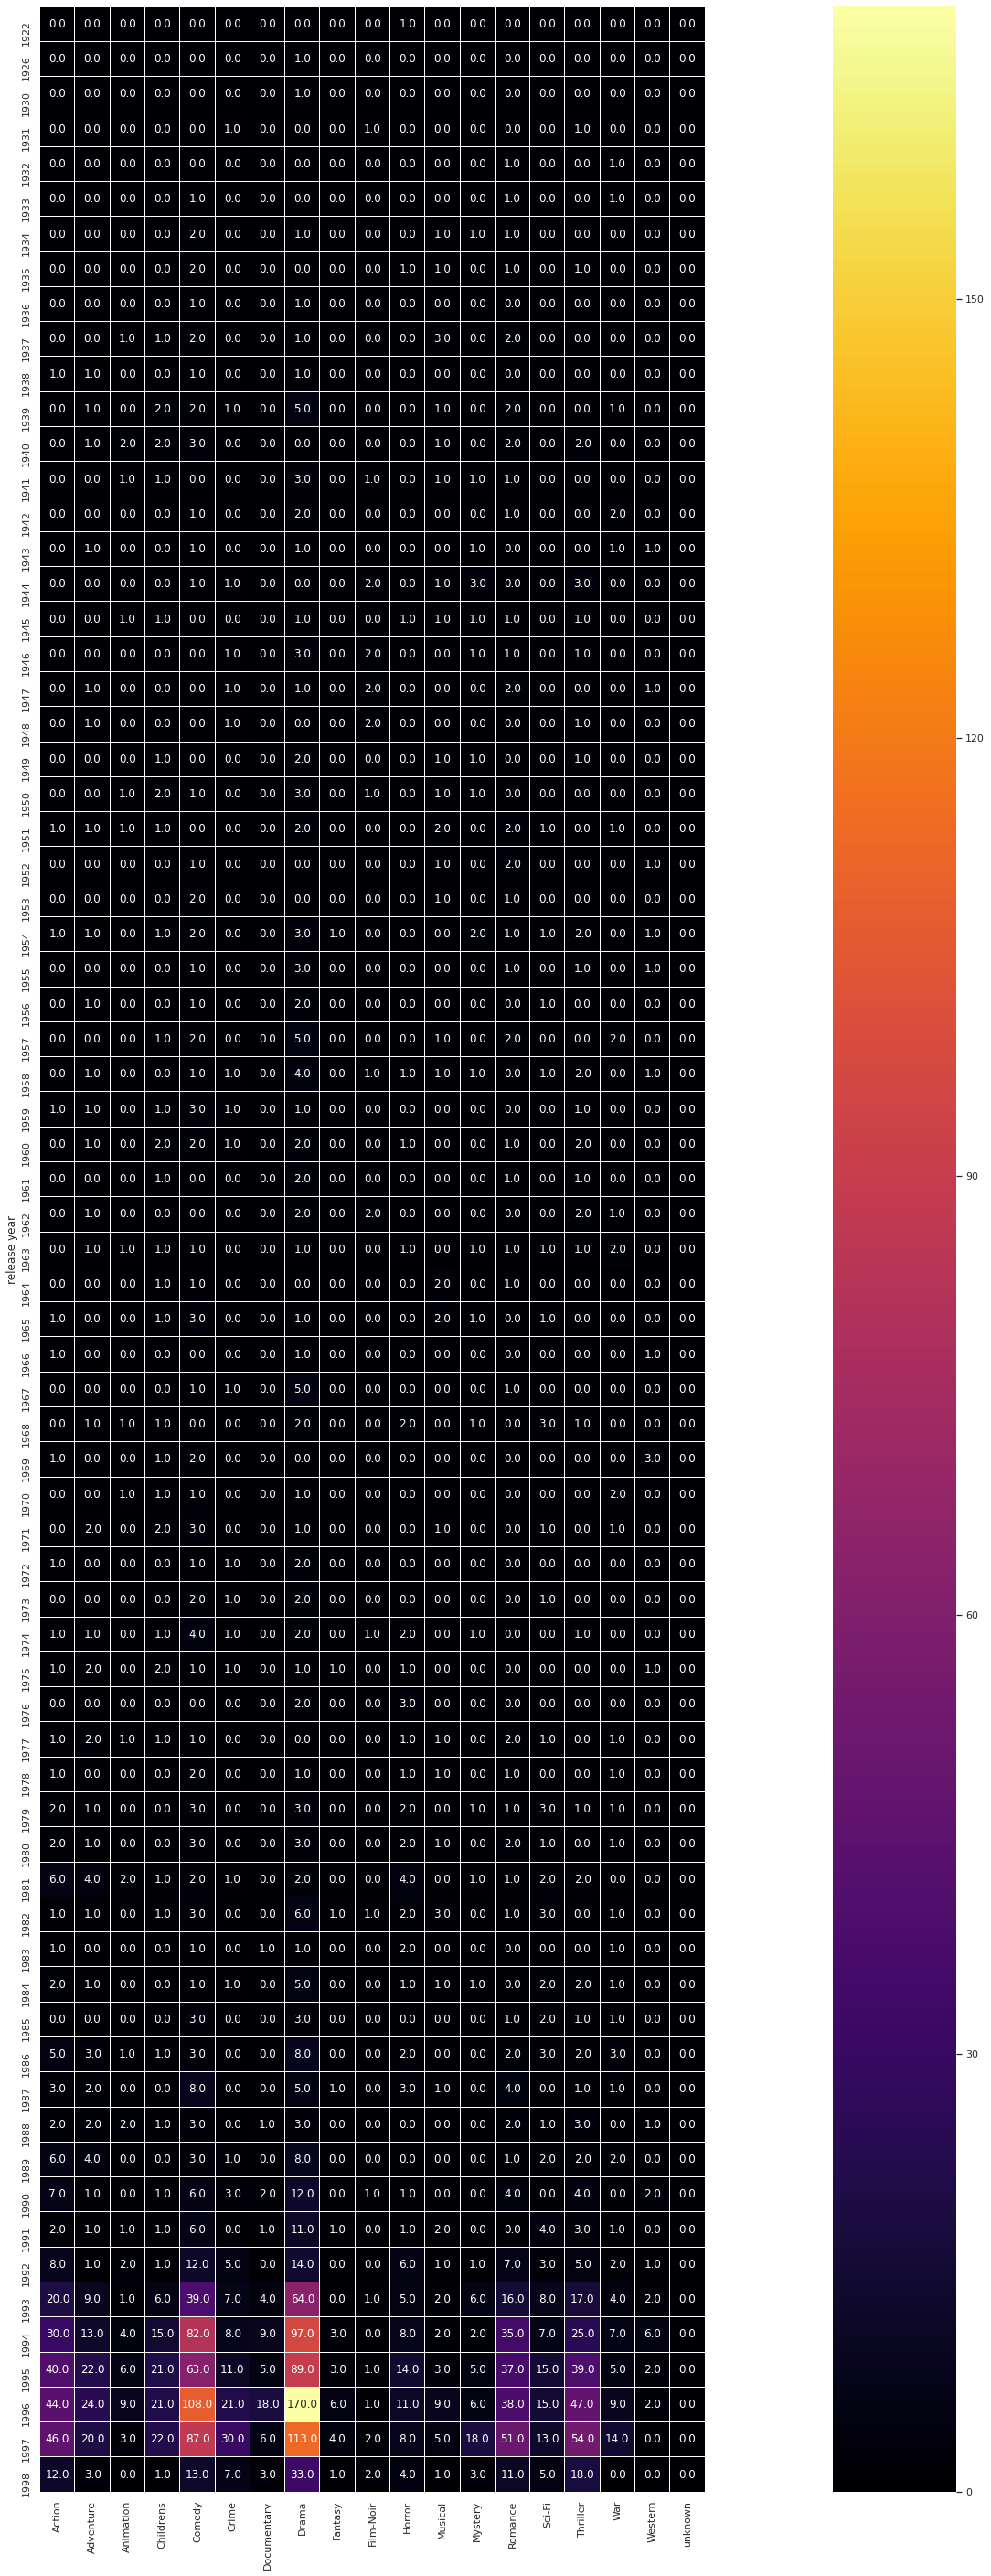

In [31]:
# finally create heat map for it
fig,ax = plt.subplots(figsize=(50,50))
sns.heatmap(genere_movie_by_year,ax=ax,annot=True,linewidths=.005,fmt='.1f',cmap='inferno',square=True)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [32]:
#your answer here

# for finding, top 25 movies, find first movies that have more than 100 rating.
# need to merge two dataframes to achive this.
movie_with_ratings = movies_df.merge(ratings_df,on="movie id").groupby(['movie id','movie title'])['rating'].count()

# now filter movie with rating has more than 100 ratings
movie_with_ratings_more_than_100 = movie_with_ratings[movie_with_ratings>100]

# sort and convert into dataframe
movie_with_ratings_more_than_100 = movie_with_ratings_more_than_100.sort_values(ascending=False).to_frame()
movie_with_ratings_more_than_100 = movie_with_ratings_more_than_100.reset_index()
movie_with_ratings_more_than_100


,movie id,movie title,rating
0,50,Star Wars,583
1,258,Contact,509
2,100,Fargo,508
3,181,Return of the Jedi,507
4,294,Liar Liar,485
...,...,...,...
329,232,Young Guns,101
330,404,Pinocchio,101
331,926,Down Periscope,101
332,264,Mimic,101


In [33]:
# now create title list which has more than 100 reviews
movie_with_100_rating_count = list(movie_with_ratings_more_than_100['movie title'])
movie_with_100_rating_count

['Star Wars ',
 'Contact ',
 'Fargo ',
 'Return of the Jedi ',
 'Liar Liar ',
 'English Patient, The ',
 'Scream ',
 'Toy Story ',
 'Air Force One ',
 'Independence Day (ID4) ',
 'Raiders of the Lost Ark ',
 'Godfather, The ',
 'Pulp Fiction ',
 'Twelve Monkeys ',
 'Silence of the Lambs, The ',
 'Jerry Maguire ',
 'Rock, The ',
 'Empire Strikes Back, The ',
 'Star Trek: First Contact ',
 'Titanic ',
 'Back to the Future ',
 'Mission: Impossible ',
 'Fugitive, The ',
 'Indiana Jones and the Last Crusade ',
 'Willy Wonka and the Chocolate Factory ',
 'Princess Bride, The ',
 'Forrest Gump ',
 'Saint, The ',
 'Monty Python and the Holy Grail ',
 'Full Monty, The ',
 'Men in Black ',
 'Terminator, The ',
 'E.T. the Extra-Terrestrial ',
 'Dead Man Walking ',
 "Schindler's List ",
 'Leaving Las Vegas ',
 'L.A. Confidential ',
 'Braveheart ',
 'Conspiracy Theory ',
 'Terminator 2: Judgment Day ',
 'Twister ',
 "Mr. Holland's Opus ",
 'Birdcage, The ',
 'Alien ',
 'When Harry Met Sally... ',
 

In [34]:
# Now merging rating and movie, calculate avg rating
movie_with_ratings = ratings_df.merge(movies_df,on="movie id")
movie_rating_df = movie_with_ratings.groupby(['movie id','movie title'])['rating'].mean().sort_values(ascending=False).to_frame().reset_index()

# filter movie has 100 or more ratings by using calcullted previous list
movie_rating_df =  movie_rating_df[movie_rating_df['movie title'].isin(movie_with_100_rating_count)]

# display top 25 movies such that has more than 100 rating, 
movie_rating_df[:25]

,movie id,movie title,rating
15,408,"Close Shave, A",4.491071
16,318,Schindler's List,4.466443
17,169,"Wrong Trousers, The",4.466102
18,483,Casablanca,4.456790
20,64,"Shawshank Redemption, The",4.445230
21,603,Rear Window,4.387560
22,12,"Usual Suspects, The",4.385768
23,50,Star Wars,4.358491
24,178,12 Angry Men,4.344000
28,134,Citizen Kane,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [35]:
# merge all dataframes to achive this analysis first on movie_id and user_id
movie_rating_data = ratings_df.merge(movies_df, on="movie id")
movie_rating_by_user = movie_rating_data.merge(users_df, on="user id")

# drop unncessary columns
movie_rating_by_user.drop(columns=['timestamp','release date','release year','age','occupation','zip code'],inplace=True)

In [36]:
movie_rating_by_user.groupby('gender')['user id'].count()

gender
F    25738
M    74252
Name: user id, dtype: int64

In [37]:
# Analysis on drama movie by rating
movie_rating_by_user_for_drama  = movie_rating_by_user[movie_rating_by_user['Drama']==1]

In [38]:
# count genders
movie_rating_by_user_for_drama.groupby('gender')['user id'].count()

gender
F    11008
M    28887
Name: user id, dtype: int64

In [39]:
# calculate total women percentage for drama movie
percentage_women_for_drama = (11008/25738) * 100
percentage_women_for_drama

42.76944595539669

In [40]:
# calculate total men percentage for drama movie
percentage_men_for_drama = (28887/74252) * 100
percentage_men_for_drama

38.90400258578893

### Men watch more drama than women: Invalid statement, Justified by above total % men watched drama movie is 39% while women is 42%

In [41]:
# Analysis on Sci-Fi movie by rating
movie_rating_by_user_for_scifi  = movie_rating_by_user[movie_rating_by_user['Sci-Fi']==1]


In [42]:
# count genders
movie_rating_by_user_for_scifi.groupby('gender')['user id'].count()

gender
F     2629
M    10101
Name: user id, dtype: int64

In [43]:
# calculate total women percentage for scifi movie
percentage_women_for_scifi = (2629/25738) * 100
percentage_women_for_scifi

10.214468878700753

In [44]:
# calculate total men percentage for scifi movie
percentage_men_for_scifi = (10101/74252) * 100
percentage_men_for_scifi

13.603673975111782

### Women watch more Sci-Fi than men: Invalid statement. Justified by above observation, total % men watched scifi movie is 13.6% and women percentage is 10%

In [45]:
# Analysis on Romance movie by rating
movie_rating_by_user_for_romance = movie_rating_by_user[movie_rating_by_user['Romance']==1]

In [46]:
# count genders
movie_rating_by_user_for_romance.groupby('gender')['user id'].count()

gender
F     5858
M    13603
Name: user id, dtype: int64

In [47]:
# calculate total women percentage for romance movie
percentage_women_for_romance = (5858/25738) * 100
percentage_women_for_romance

22.760121221540135

In [48]:
# calculate total men percentage for romance movie
percentage_men_for_romance = (13603/74252) * 100
percentage_men_for_romance

18.320045251306365

### Men watch more Romance than women: Invalid statement. Seems women give higher percentage rating 22% compare to 18%